In [1]:
import pandas as pd 
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


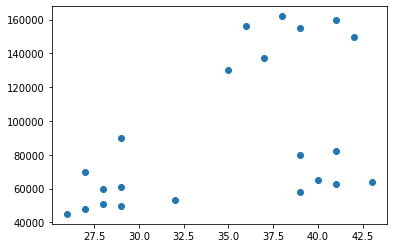

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.Age,df['Income($)'])

In [4]:
# here it's pretty clear that there are 3 appropriate clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
km.get_params(deep=True)

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [6]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [7]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


Text(0, 0.5, 'Income ($)')

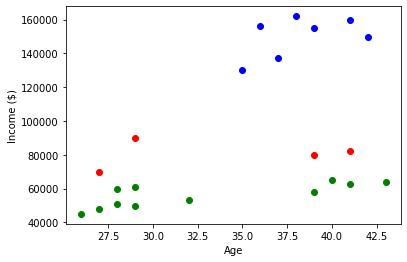

In [13]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0.Age,df0['Income($)'],color='red')
plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.xlabel('Age')
plt.ylabel('Income ($)')

C:\Users\Karen Pinto\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

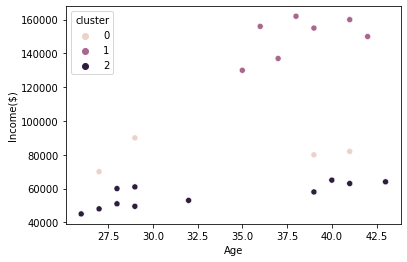

In [21]:
#or
import seaborn as sn 
sn.scatterplot(df['Age'],df['Income($)'],hue=df.cluster)

The above scatter plot shows that there is a mismatch in 2 clutsers

This is because the scaling of the dataset is not right.

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1


In [25]:
scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [26]:
km2 = KMeans(n_clusters=3)
y_pred = km2.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [27]:
df['cluster2'] = y_pred

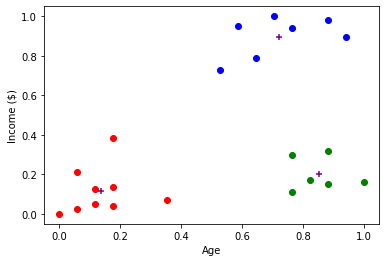

In [30]:
df0 = df[df.cluster2==0]
df1 = df[df.cluster2==1]
df2 = df[df.cluster2==2]
plt.scatter(df0.Age,df0['Income($)'],color='red')
plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.xlabel('Age')
plt.ylabel('Income ($)')

plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
# [:,0] means it goes through all rows and considers the 0th column
# [:,1] means it goes through all rows and considers the 1st column

In [29]:
km2.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [31]:
# Elbow Method to determine k
k_range = range(1,10)
sse = [] #sum of squared error
for k in k_range:
    km_model = KMeans(n_clusters=k)
    km_model.fit(df[['Age','Income($)']])
    # .inertia_ will give the sse
    sse.append(km_model.inertia_)

In [32]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.26217927623452136,
 0.22020960864009398,
 0.17462386586687897,
 0.1397684499538816,
 0.10383752586603562]

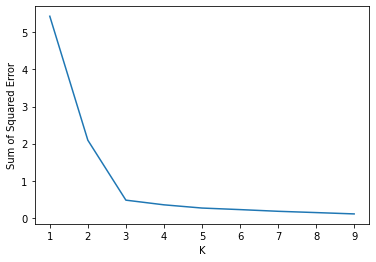

In [33]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range,sse)

In [ ]:
# here according to the elbow technique, 3 is the most suitable K value